# Revisão de código 

Olá! 

Meu nome é Suelen. Estou feliz em revisar seu projeto hoje!

Quando vejo um erro pela primeira vez, apenas aponto. Deixarei você encontrá-lo e corrigi-lo sozinho. Além disso, ao longo do texto, farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Mas se você ainda não consegue lidar com essa tarefa, darei uma dica mais precisa na próxima iteração e também alguns exemplos práticos. Estarei aberto a feedbacks e discussões sobre o tema.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como estas:


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Sucesso. Tudo está correto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

O bloco requer algumas correções. O trabalho não pode ser aceito com os comentários vermelhos.
</div>

Você pode me responder usando isto:

<div class="alert alert-block alert-info">
<b>Resposta do aluno.  
    </b> <a class="tocSkip"></a>
</div>



<div class="alert alert-block alert-success">

<b>Comentário geral: </b> <a class="tocSkip"></a>

Parabéns pela conclusão do projeto, Georgia! 🎉🚀Seu projeto está com uma qualidade fenomenal: 
- Código claro, eficiente e otimizado
- Comentários relevantes a cada etapa 


O projeto está aprovado! Parabéns!
</div>

# Regressão Linear com Mascaramento de Dados

A companhia de seguros Proteja Seu Amanhã quer resolver algumas tarefas com a ajuda de aprendizado de máquina e você precisa avaliar a possibilidade de fazê-lo.

- **Tarefa 1:** Encontrar clientes semelhantes a um determinado cliente. Isso vai ajudar os agentes da empresa com tarefas de marketing.
- **Tarefa 2:** Predizer se um novo cliente provavelmente receberá um pagamento de seguro. Um modelo de predição pode ser melhor do que um modelo dummy?
- **Tarefa 3:** Predizer o número de pagamentos de seguro que um novo cliente provavelmente receberá usando um modelo de regressão linear.
- **Tarefa 4:** Proteger os dados pessoais dos clientes sem estragar o modelo da tarefa anterior.

É necessário desenvolver um algoritmo de transformação de dados que tornaria difícil recuperar informações pessoais se os dados caíssem nas mãos erradas. Isso é chamado de mascaramento de dados ou ofuscação de dados. Mas os dados devem ser protegidos de forma que a qualidade dos modelos de aprendizado de máquina não piore. Você não precisa escolher o melhor modelo, só prove que o algoritmo funciona corretamente.

# Pré-processamento de dados & Exploração

## Inicialização

In [1]:
pip install scikit-learn --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 81.5 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'COPYING'
Consider using the `--user` option or check the permissions.

Note: you may need to restart the kernel to use updated packages.


In [2]:
import contextlib
import io
import math

import numpy as np
import pandas as pd

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split

from IPython.display import display

## Carregar Dados

Carregue os dados e faça uma verificação básica de que estão livres de problemas óbvios.

In [3]:
df = pd.read_csv('/datasets/insurance_us.csv')

Renomeamos as colunas para tornar o código mais consistente com seu estilo.

In [4]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [5]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
4739,0,37.0,33700.0,2,0
2666,0,30.0,36400.0,3,0
2093,1,21.0,43500.0,2,0
728,0,40.0,32500.0,1,0
4297,1,34.0,41100.0,0,0
218,0,29.0,38500.0,0,0
4678,0,18.0,33300.0,2,0
3424,0,38.0,49600.0,0,0
2787,0,19.0,33100.0,2,0
1160,1,21.0,35000.0,3,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [7]:
# podemos querer corrigir o tipo de idade (de float para int), embora isso não seja crítico

# escreva sua conversão aqui se você escolher:
df['age'] = df['age'].astype('int')

In [8]:
# verifique se a conversão foi bem-sucedida
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [9]:
# agora dê uma olhada nas estatísticas descritivas dos dados.
# Parece que está tudo bem?
df.isnull().value_counts()

gender  age    income  family_members  insurance_benefits
False   False  False   False           False                 5000
dtype: int64

In [10]:
# Conferindo se há valores extremos
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


- [x]  **Não há dados ausentes**
- [x]  **Aparentemente não há valores extremos**

## AED

Vamos verificar rapidamente se existem determinados grupos de clientes observando o gráfico de pares.

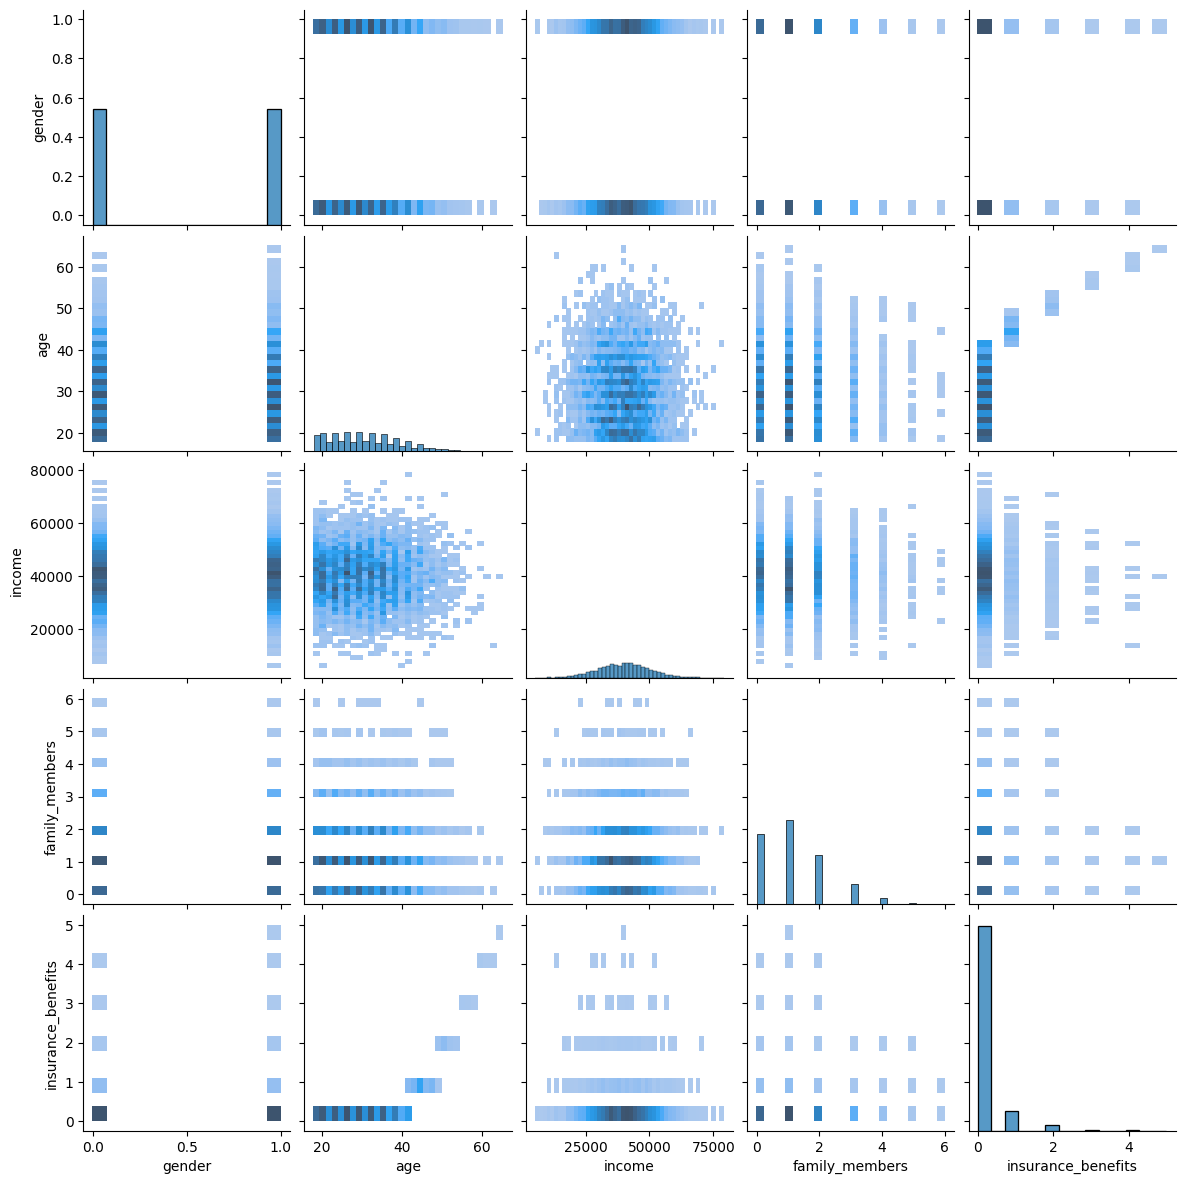

In [11]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Ok, é um pouco difícil identificar grupos óbvios (clusters), pois é difícil combinar várias variáveis simultaneamente (para analisar distribuições multivariadas). É aí que Álgebra Linear e Aprendizado de Máquina podem ser bastante úteis.

<div class="alert alert-block alert-success">

<b>Comentário: </b> <a class="tocSkip"></a>

Processamento de dados realizado com sucesso:
- Transformação das colunas para o padrão snake_case
- Tratamento do tipo de dado
- Análise visual das variáveis  
</div>

# Tarefa 1. Clientes Similares

Na linguagem de AM, é necessário desenvolver um procedimento que retorne k vizinhos mais próximos (objetos) para um determinado objeto com base na distância entre os objetos.
Você pode querer rever as seguintes lições (capítulo -> lição)
- Distância Entre Vetores -> Distância Euclidiana
- Distância Entre Vetores -> Distância de Manhattan

Para resolver a tarefa, podemos tentar diferentes métricas de distância.

Escreva uma função que retorne k vizinhos mais próximos para um n-ésimo objeto com base em uma métrica de distância especificada. O número de pagamentos de seguro recebidos não deve ser levado em consideração para esta tarefa. 

Você pode usar uma implementação pronta do algoritmo kNN do scikit-learn (verifique [o link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) ou usar a sua própria.
Teste-o para quatro combinações de dois casos
- Escalabilidade
  - os dados não são escalados
  - os dados escalados com o escalonador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) 
- Métricas de distância
  - Euclidiana
  - Manhattan

Responda às perguntas:
- Os dados não escalados afetam o algoritmo kNN? Se sim, como isso acontece?
-Quão semelhantes são os resultados usando a métrica de distância de Manhattan (independentemente da escalabilidade)?

In [12]:
feature_names = ['gender', 'age', 'income', 'family_members']
target = 'insurance_benefits'

In [13]:
def get_knn(df, n, k, metric):
    
    """
    Retorna os vizinhos mais próximos de k

    :param df: DataFrame pandas usado para encontrar objetos semelhantes dentro de
    :param n: número do objeto pelo qual os vizinhos mais próximos são procurados
    :param k: o número dos vizinhos mais próximos a serem retornados
    :param metric: nome da métrica de distância    """

    nbrs = sklearn.neighbors.KNeighborsRegressor(n_neighbors=k, metric=metric).fit(df[feature_names], df[target]) # <escreva seu código aqui> 
    nbrs_distances, nbrs_indices = nbrs.kneighbors(X=[df.iloc[n][feature_names]], n_neighbors=k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Escalando os dados

In [14]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [15]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
3987,1.0,0.461538,0.182278,0.333333,0
3679,0.0,0.676923,0.365823,0.000000,1
4620,1.0,0.446154,0.524051,0.666667,0
305,1.0,0.415385,0.601266,0.500000,0
4152,0.0,0.400000,0.548101,0.333333,0


Agora, vamos obter registros semelhantes para um determinado registro para cada combinação

In [16]:
# Teste para dados não escalados, distância Euclidiana:
not_scaled_results = get_knn(df, 263, 6, 'euclidean')
not_scaled_results

,gender,age,income,family_members,insurance_benefits,distance
263,0,43,36000.0,1,1,0.000000
531,0,41,36000.0,1,0,2.000000
2092,0,42,36000.0,3,0,2.236068
1249,1,41,36000.0,3,0,3.000000
286,0,39,36000.0,0,0,4.123106
2161,1,39,36000.0,0,0,4.242641


In [17]:
# Teste para dados escalados, distância Euclidiana:
scaled_results = get_knn(df_scaled, 263, 6, 'euclidean')
scaled_results

,gender,age,income,family_members,insurance_benefits,distance
263,0.0,0.661538,0.455696,0.166667,1,0.000000
4847,0.0,0.661538,0.463291,0.166667,1,0.007595
3008,0.0,0.676923,0.453165,0.166667,1,0.015592
4298,0.0,0.661538,0.472152,0.166667,1,0.016456
1757,0.0,0.646154,0.449367,0.166667,1,0.016636
4058,0.0,0.646154,0.462025,0.166667,1,0.016636


In [18]:
# Teste para dados não escalados, distância Manhattan:
manh_not_scaled_results = get_knn(df, 263, 6, 'cityblock')
manh_not_scaled_results

,gender,age,income,family_members,insurance_benefits,distance
263,0,43,36000.0,1,1,0.0
531,0,41,36000.0,1,0,2.0
2092,0,42,36000.0,3,0,3.0
286,0,39,36000.0,0,0,5.0
1249,1,41,36000.0,3,0,5.0
2161,1,39,36000.0,0,0,6.0


In [19]:
# Teste para dados escalados, distância Manhattan:
manh_scaled_results = get_knn(df_scaled, 263, 6, 'cityblock')
manh_scaled_results

,gender,age,income,family_members,insurance_benefits,distance
263,0.0,0.661538,0.455696,0.166667,1,0.000000
4847,0.0,0.661538,0.463291,0.166667,1,0.007595
4298,0.0,0.661538,0.472152,0.166667,1,0.016456
3008,0.0,0.676923,0.453165,0.166667,1,0.017916
1757,0.0,0.646154,0.449367,0.166667,1,0.021714
4058,0.0,0.646154,0.462025,0.166667,1,0.021714


Respostas para as perguntas

**Os dados não escalados afetam o algoritmo kNN? Se sim, como isso acontece?** 

Sim, os dados não escalados afetam o algoritmo kNN negativamente, os resultados mais próximos ficam a uma 'distância' muito maior do que quando os dados são escalados e o objetivo (requisição de benefícios do seguro) diferem do dado inicial.

**Quão semelhantes são os resultados usando a métrica de distância de Manhattan (independentemente da escalabilidade)?** 

A escalabilidade, sem dúvidas, impacta mais os resultados do que a métrica de distância escolhida, porém, todos os resultados calculados pela distância Manhattan são ligeiramente mais distantes do que os calculados pela distância Euclideana.

Ambas as métricas de distâncias resultam nos mesmos k vizinhos mais próximos, alternando um ou outro a partir do terceiro mais próximo.

<div class="alert alert-block alert-success">

<b>Comentário: </b> <a class="tocSkip"></a>

Tarefa realizada com sucesso: 
- Dados foram escalonados perfeitamente
- O modelo Knn foi aplicado
- Comentários pertinentes à análise foram adicionados 
</div>

# Tarefa 2. É provável que o cliente receba um pagamento do seguro?

Em termos de aprendizado de máquina, podemos olhar para isso como uma tarefa de classificação binária.

Com os pagamentos de seguro sendo mais do que zero como objetivo, avalie se a abordagem da classificação kNN pode ser melhor do que um modelo dummy.

Instruções:
- Construa um classificador baseado em kNN e meça sua qualidade com a métrica F1 para k=1..10 tanto para os dados originais quanto para os escalados. Seria interessante ver como k pode influenciar a métrica de avaliação e se a escalabilidade dos dados faz alguma diferença. Você pode usar uma implementação pronta do algoritmo de classificação kNN do scikit-learn (verifique [o link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) ou usar a sua própria.
- Construa o modelo dummy, que é aleatório para este caso. Deve retornar com alguma probabilidade o valor "1". Vamos testar o modelo com quatro valores de probabilidade: 0, a probabilidade de fazer qualquer pagamento de seguro, 0,5, 1.

A probabilidade de fazer qualquer pagamento de seguro pode ser definida como

$$
P = \text{Pagamento de seguro recebido}= \frac{\text{Número de clientes que receberam qualquer pagamento de seguro}}{\text{Número total de clientes}}.
$$

Divida os dados inteiros na proporção 70:30 para as partes de treinamento/teste.

In [20]:
# calcule a meta
df['insurance_benefits_received'] = df['insurance_benefits'].apply(lambda x: 1 if x > 0 else 0) #<seu código aqui>

In [21]:
# verifique o desequilíbrio de classe com value_counts()

# <seu código aqui>
df['insurance_benefits_received'].value_counts()

0    4436
1     564
Name: insurance_benefits_received, dtype: int64

- [x] **Há um desequilíbro significativo entre as classes (quase 8 para 1).**

In [22]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# se você tiver um problema com a linha a seguir, reinicie o kernel e execute o caderno novamente
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriz de Confusão')
    print(cm)
    return {'f1' : f1_score, 'confusion matrix': cm}

In [23]:
# gerando saída de um modelo aleatório

def rnd_model_predict(P, size, seed=42):
    """
    Gera previsões binárias com base em uma distribuição binomial.

    Esta função utiliza uma distribuição binomial para simular previsões de um modelo.
    Os valores preditos são gerados como 0 ou 1, onde a probabilidade de 1 é dada por `P`.

    Parâmetros:
    -----------
    P : float
        Probabilidade de sucesso (valor 1) para cada experimento da distribuição binomial. 
        Deve estar no intervalo [0, 1].
    size : int
        Número de previsões a serem geradas.
    seed : int, opcional, padrão=42
        Semente para o gerador de números aleatórios, garantindo reprodutibilidade dos resultados.

    Retorno:
    --------
    np.ndarray
        Um array de tamanho `size` contendo os valores 0 ou 1 gerados pela distribuição binomial.

    Exemplo de Uso:
    ---------------
    >>> import numpy as np
    >>> rnd_model_predict(0.7, 10, seed=123)
    array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1])
    """

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [24]:
# Treinando e testando modelo dummy

for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'A probabilidade: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, len(df)) # <seu código aqui>
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

A probabilidade: 0.00
F1: 0.00
Matriz de Confusão
[[0.8872 0.    ]
 [0.1128 0.    ]]

A probabilidade: 0.11
F1: 0.12
Matriz de Confusão
[[0.7914 0.0958]
 [0.0994 0.0134]]

A probabilidade: 0.50
F1: 0.20
Matriz de Confusão
[[0.456  0.4312]
 [0.053  0.0598]]

A probabilidade: 1.00
F1: 0.20
Matriz de Confusão
[[0.     0.8872]
 [0.     0.1128]]



<div class="alert alert-block alert-warning">

<b>Comentário: </b> <a class="tocSkip"></a>

Ambos os modelos foram aplicados corretamente. Sugestão: Caso queira visualizar as matrizes de confusão em forma gráfica, é possível utilizar a função heatmap da biblioteca seaborn:
    

 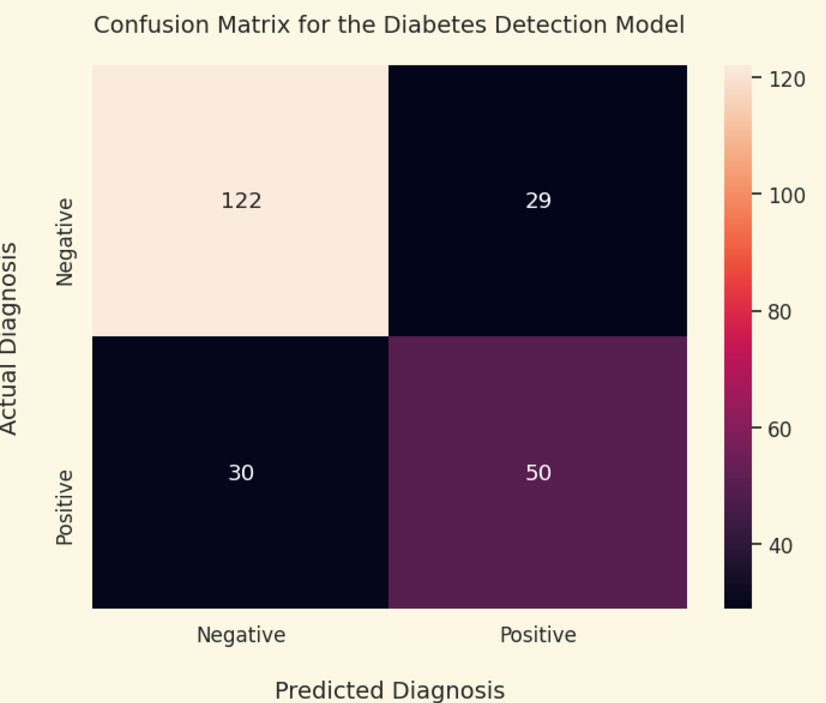   
    
Saiba mais em: https://seaborn.pydata.org/generated/seaborn.heatmap.html 
</div>

- [x] **No modelo aleatório o maior valor de F1 foi de 0,20 considerado muito baixo.**

In [25]:
# Criando classificador kNN:

def knn_predictions(df_train, df_test, k, metric):
    """
    Retorna as previsões para o modelo de classificador de vizinhos mais próximos
    
    :param df_train: DataFrame pandas usado para treinar o modelo
    :param df_test: DataFrame pandas do conjunto de testes
    :param k: número de vizinhos mais próximos a serem considerados nos cálculos do modelo
    :param metric: nome da métrica de distância """
    
    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, metric=metric)
    model.fit(df_train[feature_names], df['insurance_benefits_received'].loc[df_train.index])
    
    predictions = model.predict(df_test[feature_names])
    
    return predictions

In [26]:
# Dividindos os dados em conjuntos de treinamento e teste:

df_train, df_test, df_scaled_train, df_scaled_test = train_test_split(df, df_scaled, test_size=0.3, random_state=123)

In [27]:
def eval_classifier_silent(func, target, predictions):
    with contextlib.redirect_stdout(io.StringIO()):
        return func(target, predictions)

In [28]:
# Testando o modelo treinado para os dados não escalados:

results = []
for metrics in ['euclidean', 'cityblock']:
    for k in range(1, 11, 1):
        predictions = knn_predictions(df_train, df_test, k, metrics)
        
        evaluation = eval_classifier_silent(eval_classifier, df['insurance_benefits_received'].loc[df_test.index], predictions)
        f1_score = evaluation['f1']
        confusion_matrix =evaluation['confusion matrix']
        
        results.append({
            'metric' : metrics,
            'k' : k,
            'f1_score' : f1_score,
            'tn': confusion_matrix[0, 0],  # Verdadeiros Negativos
            'fp': confusion_matrix[0, 1],  # Falsos Positivos
            'fn': confusion_matrix[1, 0],  # Falsos Negativos
            'tp': confusion_matrix[1, 1],   # Verdadeiros Positivos
        })
        
        df_results = pd.DataFrame(results)

print('Dados não escalados:')
df_results.sort_values('f1_score', ascending=False)

Dados não escalados:


,metric,k,f1_score,tn,fp,fn,tp
0,euclidean,1,0.666667,0.868000,0.018667,0.047333,0.066000
10,cityblock,1,0.657718,0.866667,0.020000,0.048000,0.065333
12,cityblock,3,0.410042,0.873333,0.013333,0.080667,0.032667
2,euclidean,3,0.408333,0.872667,0.014000,0.080667,0.032667
1,euclidean,2,0.401786,0.880667,0.006000,0.083333,0.030000
11,cityblock,2,0.394619,0.880667,0.006000,0.084000,0.029333
14,cityblock,5,0.232323,0.883333,0.003333,0.098000,0.015333
4,euclidean,5,0.231156,0.882667,0.004000,0.098000,0.015333
3,euclidean,4,0.196891,0.884000,0.002667,0.100667,0.012667
13,cityblock,4,0.196891,0.884000,0.002667,0.100667,0.012667


In [ ]:
<div class="alert alert-block alert-success">

<b>Comentário: </b> <a class="tocSkip"></a>

Gostei da forma com que você gerou a tabela acima! É uma boa forma de visualizar e comparar resultados.Muito bom!
</div>

- [x] **Com os dados não escalados ambas as métricas (Euclideana e Manhattan) apresentam desempenho parecido para a mesma quantidade de 'k' vizinhos.** Os modelos com apenas 1 vizinho sendo considerado no cálculo são nitidamente mais eficazes que qualquer outro.**

In [29]:
# Testando o modelo treinado para os dados escalados:

results = []
for metrics in ['euclidean', 'cityblock']:
    for k in range(1, 11, 1):
        predictions = knn_predictions(df_scaled_train, df_scaled_test, k, metrics)
        
        evaluation = eval_classifier_silent(eval_classifier, df['insurance_benefits_received'].loc[df_scaled_test.index], predictions)
        f1_score = evaluation['f1']
        confusion_matrix =evaluation['confusion matrix']
        
        results.append({
            'metric' : metrics,
            'k' : k,
            'f1_score' : f1_score,
            'tn': confusion_matrix[0, 0],  # Verdadeiros Negativos
            'fp': confusion_matrix[0, 1],  # Falsos Positivos
            'fn': confusion_matrix[1, 0],  # Falsos Negativos
            'tp': confusion_matrix[1, 1],   # Verdadeiros Positivos
        })
        
        df_results = pd.DataFrame(results)

print('Dados escalados:')
df_results.sort_values('f1_score', ascending=False)

Dados escalados:


,metric,k,f1_score,tn,fp,fn,tp
0,euclidean,1,0.949254,0.882667,0.004000,0.007333,0.106000
10,cityblock,1,0.942943,0.882667,0.004000,0.008667,0.104667
16,cityblock,7,0.941896,0.884667,0.002000,0.010667,0.102667
6,euclidean,7,0.941538,0.885333,0.001333,0.011333,0.102000
18,cityblock,9,0.941538,0.885333,0.001333,0.011333,0.102000
17,cityblock,8,0.937500,0.886667,0.000000,0.013333,0.100000
2,euclidean,3,0.934985,0.885333,0.001333,0.012667,0.100667
8,euclidean,9,0.934985,0.885333,0.001333,0.012667,0.100667
14,cityblock,5,0.932515,0.884000,0.002667,0.012000,0.101333
12,cityblock,3,0.931250,0.886000,0.000667,0.014000,0.099333


- [x] **Com os dados escalados até mesmo o pior entre os 20 modelos testados possui uma métrica F1 considerada boa (0.899)!** Quando comparamos as métricas para diferentes números de 'k' vizinhos considerados parece que não há grande influência sobre s resultados, apesar de os modelos considerando apenas 1 'k' vizinho ainda se sairem melhor que os outros, a taxa entre eles diminui.

# Tarefa 3. Regressão (com Regressão Linear)

Com os pagamentos de seguro como objetivo, avalie qual seria o REQM para um modelo de Regressão Linear.

Construa sua própria implementação de Regressão Linear. Para isso, lembre-se de como a solução da tarefa de regressão linear é formulada em termos de Álgebra linear. Verifique o REQM para os dados originais e os escalados. Você pode ver alguma diferença no REQM entre esses dois casos?

Vamos denotar
- $X$ — matriz de características, cada linha é um caso, cada coluna é uma característica, a primeira coluna consiste em unidades
- $y$ — objetivo (um vetor)
- $\hat{y}$ — objetivo estimado (um vetor)
- $w$ — vetor de peso

A tarefa de regressão linear na linguagem de matrizes pode ser formulada como
$$
y = Xw
$$

O objetivo do treinamento, então, é encontrar os $w$ que minimizaria a distância L2 (EQM) entre $Xw$ e $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que há uma solução analítica para a questão acima:

$$
w = (X^T X)^{-1} X^T y
$$

A fórmula acima pode ser usada para encontrar os pesos $w$ e o último pode ser usado para calcular valores preditos

$$
\hat{y} = X_{val}w
$$

Divida todos os dados na proporção 70:30 para as partes de treinamento/validação. Use a métrica REQM para a avaliação do modelo.

In [30]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # somando as unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y) # <seu código aqui>
        self.w = self.weights[1:]
        self.w0 = self.weights[0]

    def predict(self, X):
        
        # somando as unidades
        y_pred = X.dot(self.w) + self.w0 # <seu código aqui>
        
        return y_pred

In [31]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'REQM: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [32]:
# Testando o modelo com os dados não escalados:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)

print('Dados não escalados:')
print()
print('Pesos das características:')
print(lr.weights)
print()

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

Dados não escalados:

Pesos das características:
[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]

REQM: 0.34
R2: 0.66


In [33]:
# Testando o modelo com os dados escalados:
X = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df_scaled['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)

print('Dados escalados:')
print()
print('Pesos das características:')
print(lr.weights)
print()

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

Dados escalados:

Pesos das características:
[-0.94353901  2.32372069  0.01642727 -0.02059875 -0.07014128]

REQM: 0.34
R2: 0.66


<div class="alert alert-block alert-success">

<b>Comentário: </b> <a class="tocSkip"></a>

Modelo de regressão linear realizado corretamente.
</div>

- [x] **Para a Regressão Linear, apesar de os pesos sofrerem alterações quando os dados são escalonados, não há alteração alguma nas métricas de REQM nem de R2.**

# Tarefa 4. Ofuscando dados

É melhor ofuscar os dados multiplicando as características numéricas (lembre-se, elas podem ser vistos como a matriz $X$) por uma matriz invertível $P$. 

$$
X' = X \times P
$$

Tente fazer isso e verifique como os valores das características ficarão após a transformação. Aliás, a invertibilidade é importante aqui, portanto, certifique-se de que $P$ seja realmente invertível.

Você pode querer revisar a lição 'Matrizes e Operações com Matrizes -> Multiplicação de Matrizes' para relembrar a regra de multiplicação de matrizes e sua implementação com NumPy.

In [34]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [35]:
X = df_pn.to_numpy()

Gerando uma matriz $P$ aleatória.

In [36]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Verificando se a matriz $P$ é invertível

In [37]:
np.linalg.inv(P)

array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

- [x]  **Sim, a matriz $P$ é invertível.**

Você consegue adivinhar a idade ou a renda dos clientes após a transformação?

In [39]:
# Aplicando tranformação de Ofuscamento de Dados
dazzled = X @ P
dazzled

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

- [x] **Após a transformação não consigo dizer nem qual coluna que armazena quais dados...**

Você pode recuperar os dados originais de $X′$ se souber $P$? Tente verificar isso com cálculos movendo $P$ do lado direito da fórmula acima para o esquerdo. As regras da multiplicação de matrizes são realmente úteis aqui

In [61]:
X_rec = np.dot(dazzled, np.linalg.inv(P))
X_rec

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [-4.47363596e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [-2.51586878e-12,  2.90000000e+01,  2.10000000e+04,
         9.52452315e-13],
       ...,
       [-1.92837871e-12,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

- [x] **Sim! É possível recuperar X se souber P**

Imprima todos os três casos para alguns clientes
- Os dados originais
- O transformado
- O invertido (recuperado)

In [59]:
# Imprimindo os dados originais de 5 clientes aleatórios:
pd.DataFrame(X).sample(5, random_state=333)

,0,1,2,3
2844,1.0,28.0,41100.0,0.0
995,0.0,28.0,39700.0,0.0
3153,0.0,36.0,35400.0,3.0
2827,1.0,33.0,39900.0,0.0
1702,1.0,23.0,18200.0,2.0


In [60]:
# Imprimindo os dados transformados dos mesmos 5 clientes aleatórios:
pd.DataFrame(dazzled).sample(5, random_state=333)

,0,1,2,3
2844,5268.881225,18538.618352,15261.969306,38112.748210
995,5088.748183,17907.639160,14741.993474,36814.579858
3153,4540.544577,15981.252891,13154.981330,32836.460636
2827,5115.615752,18003.033338,14820.817375,37004.560545
1702,2335.895880,8221.547785,6767.775680,16886.354122


In [118]:
# Imprimindo os dados recuperados dos mesmos 5 clientes aletórios:
pd.DataFrame(X_rec).sample(5, random_state=333)

,0,1,2,3
2844,1.000000e+00,28.0,41100.0,1.157864e-12
995,-5.766220e-12,28.0,39700.0,3.292319e-12
3153,-6.855402e-12,36.0,35400.0,3.000000e+00
2827,1.000000e+00,33.0,39900.0,3.135436e-12
1702,1.000000e+00,23.0,18200.0,2.000000e+00


Você provavelmente pode ver que alguns valores não são exatamente iguais aos dos dados originais. Qual pode ser a razão disso?

- [x] **Todos os valores originais '0' se tornaram números aparentemente aleatórios elevados a -12**

In [147]:
identidade = np.linalg.inv(P) @ P
pd.DataFrame(identidade)

,0,1,2,3
0,1.000000e+00,-5.507917e-16,-5.000987e-16,-2.570007e-16
1,-5.019294e-17,1.000000e+00,-2.911315e-16,-5.211644e-17
2,-8.807037e-17,-8.523964e-17,1.000000e+00,6.696737e-18
3,-1.047680e-17,-9.834522e-17,-1.101089e-16,1.000000e+00


- [x] **Possível causa:**

**Quase Ortogonalidade:** A matriz de ofuscamento $P$ contém linhas ou colunas quase ortogonais *(com vetores de produtos internos que resultam em valores muito baixos)*. Se a **Matriz Identidade** não possui zeros absolutos, a matriz recuperada também sofrerá alterações nos números sensíveis a valores extremamente baixos.

## Provas de que a ofuscação de dados pode funcionar com a Regressão Linear

A tarefa de regressão foi resolvida com regressão linear neste projeto. Sua próxima tarefa é provar analiticamente que o método de ofuscação fornecido não afetará a regressão linear em termos de valores preditos, ou seja, seus valores permanecerão os mesmos. Você acredita nisso? Bem, você não precisa acreditar, você deve provar isso!

Assim, os dados são ofuscados e há $X \ P$ em vez de apenas X agora. Consequentemente, existem outros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$


1. Como  $w$ e $w_P$ seriam ligados se você simplificasse a fórmula para $w_P$ acima? 

2. Quais seriam os valores previstos com $w_P$? 

3. O que isso significa para a qualidade da regressão linear se você medir com REQM?

Verifique o Apêndice B Propriedades das Matrizes no final do caderno. Existem fórmulas úteis lá!

Nenhum código é necessário nesta seção, apenas explicação analítica!

**Resposta**

1. Simplificando $w_P$:

$$
 w_P = \frac{[(XP)^T XP]^{-1} (XP)^T y}{P} \quad = \quad [(XP)^T XP]^{-1} (XP)^T \frac{y}{P} \quad = \quad w \frac{y}{P} \quad = \quad wyP^{-1}
$$
    
    
2. Os valores previstos com $w_P$ seriam:
$$
y = X(w_P) \quad = \quad X (w y P^{-1})
$$

    Logo, o vetor objetivo sofreria alterações em relação ao peso de cálculo distorcendo igualmente todas as previsões.
    
    
3. O valor do REQM aumentará, representando uma queda na qualidade da Regressão Linear, para evitar este problema seria necessário, teoricamente, multiplicar a matriz por $P^{-1}$ durante o processo da Regressão Linear.

**Prova analítica**

1.  Distributividade: $A(B+C)=AB+AC$ 
2. Propriedade associativa da multiplicação: $(AB)C = A(BC)$
3. Propriedade de identidade multiplicativa: $(AB)^{-1} = B^{-1}A^{-1}$

## Teste de regressão linear com ofuscação de dados

Agora, vamos provar que a Regressão Linear pode funcionar computacionalmente com a transformação de ofuscação escolhida.
Crie um procedimento ou uma classe que execute a Regressão Linear opcionalmente com a ofuscação. Você pode usar uma implementação pronta de Regressão Linear do scikit-learn ou sua própria.

Execute a Regressão Linear para os dados originais e os ofuscados, compare os valores previstos e os valores da métrica $R^2$ do REQM. Há alguma diferença?

**Procedimento**

- Crie uma matriz quadrada $P$ de números aleatórios.
- Verifique se é invertível. Caso contrário, repita o primeiro ponto até obtermos uma matriz invertível.
- <! seu comentário aqui!>
- Use $XP$ como a nova matriz de características

In [163]:
# Executando Regressão Linear para os dados Originais:
X = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df_scaled['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

original_model = sklearn.linear_model.LinearRegression().fit(X_train, y_train)
original_predictions = original_model.predict(X_test)
original_mse = sklearn.metrics.mean_squared_error(y_test, original_predictions)

print(f'REQM do modelo treinado com os dados originais: {original_mse:.2f}')

REQM do modelo treinado com os dados originais: 0.12


In [164]:
# Gerando matriz aleatória P:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

In [165]:
# Conferindo se P é invertível:
np.linalg.inv(P)

array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

In [166]:
# Executando Regressão Linear para os dados Ofuscados:
Xp = X @ P

Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp, y, test_size=0.3, random_state=12345)

dazzled_model = sklearn.linear_model.LinearRegression().fit(Xp_train, yp_train)
dazzled_predictions = original_model.predict(Xp_test)
dazzled_mse = sklearn.metrics.mean_squared_error(yp_test, dazzled_predictions)

print(f'REQM do modelo treinado com os dados ofuscados: {dazzled_mse:.2f}')

REQM do modelo treinado com os dados ofuscados: 0.27


In [185]:
# Aplicando o ofuscamento em todo o DataFrame original:
# Gerando matriz aleatória P:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(df_scaled.shape[1], df_scaled.shape[1]))

In [187]:
# Conferindo se P é invertível:
np.linalg.inv(P)

array([[ 1.41035943,  0.90610582, -2.00787937,  1.47271069, -0.74623617],
       [-0.28558107,  0.49848661,  1.15086093,  0.0066473 , -0.91487427],
       [-0.69970518, -0.42288786,  1.45986829, -2.04553524,  1.15768716],
       [ 1.13604007, -0.85209178, -0.28484747,  0.86319324, -0.18263762],
       [-1.6744307 ,  0.39554207, -0.06237199,  0.12315311,  1.19402846]])

In [177]:
# Aplicando o ofuscamento em todo o DataFrame original:
dazzled = df_scaled.to_numpy() @ P

Xp = dazzled[:, :3]
yp = dazzled[:, 4]

Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp, yp, test_size=0.3, random_state=12345)

dazzled_model1 = sklearn.linear_model.LinearRegression().fit(Xp_train, yp_train)
dazzled_predictions1 = dazzled_model1.predict(Xp_test)
dazzled_mse1 = sklearn.metrics.mean_squared_error(yp_test, dazzled_predictions)

print(f'REQM do modelo treinado com os dados ofuscados tanto nas features quanto no target: {dazzled_mse1:.2f}')

REQM do modelo treinado com os dados ofuscados tanto nas features quanto no target: 0.23


In [225]:
# Conferindo 2 objetivos selecionados - original:
print(f'Targets originais, sem ofuscamento dos dados:')
print()
print(df_scaled["insurance_benefits"].iloc[[995, 5]])

Targets originais, sem ofuscamento dos dados:

995    0
5      1
Name: insurance_benefits, dtype: int64


In [226]:
# Conferindo 2 objetivos selecionados - target ofuscado:
print(f'Targets ofuscados:')
print()
print(pd.DataFrame(yp_test).iloc[[995, 5]])

Targets ofuscados:

            0
995  0.728506
5    0.581219


In [231]:
# Conferindo 2 objetivos selecionados - predição do modelo com somente features ofuscadas:
print(f'Predições com o modelo treinado somente com as features ofuscadas:')
print()
print(pd.DataFrame(dazzled_predictions).iloc[[995, 5]])

Predições com o modelo treinado somente com as features ofuscadas:

            0
995  0.747757
5    0.262005


In [232]:
# Conferindo 2 objetivos selecionados - predição do modelo com features e target originais ofuscados:
print(f'Predições com o modelo treinado com as features e os targets ofuscados:')
print()
print(pd.DataFrame(dazzled_predictions1).iloc[[995, 5]])

Predições com o modelo treinado com as features e os targets ofuscados:

            0
995  0.541023
5    0.890990


- [x] **Tentando encontrar uma seed que melhore os resultados:**

In [265]:
target_original = df_scaled.iloc[:, 4]  # Target original

best_seed = None
best_diff = float('inf')  # Inicializa com um valor grande para comparação
best_yp = None

for seed in range(30000,40000):
    rng = np.random.default_rng(seed=seed)
    P = rng.random(size=(df_scaled.shape[1], df_scaled.shape[1]))
    try:
        inv_P = np.linalg.inv(P)
        dazzled = df_scaled.to_numpy() @ P
        Xp = dazzled[:, :3]
        yp = dazzled[:, 4]
        
        
        # Calcula a diferença absoluta entre yp e o target original
        diff = np.linalg.norm(yp - target_original)
        
        # Atualiza a melhor seed se a diferença for menor
        if diff < best_diff:
            best_seed = seed
            best_diff = diff
            best_yp = yp
            
    except LinAlgError:
        continue
        
print(f"A melhor seed é {best_seed} com uma diferença de {best_diff}.")

A melhor seed é 33013 com uma diferença de 5.087792442907751.


In [255]:
# Aplicando o ofuscamento em todo o DataFrame original:
# Gerando matriz aleatória P:
rng = np.random.default_rng(seed=33013)
P = rng.random(size=(df_scaled.shape[1], df_scaled.shape[1]))

In [256]:
# Conferindo se P é invertível:
np.linalg.inv(P)

array([[-0.23897239, -0.41664629,  1.75134957,  0.30653177, -0.03794919],
       [-5.04718743,  6.11094144, -0.23022031,  3.45819846, -0.26974546],
       [ 6.41381133, -4.4882623 , -0.23813164, -5.5026139 ,  0.45942842],
       [-0.14739949, -1.37020985, -0.02890271,  1.7835817 , -0.21309133],
       [ 2.01371266, -2.99431991, -0.836971  , -1.83271669,  1.31835836]])

In [257]:
# Aplicando o ofuscamento em todo o DataFrame original:
dazzled = df_scaled.to_numpy() @ P

Xp = dazzled[:, :3]
yp = dazzled[:, 4]

Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp, yp, test_size=0.3, random_state=12345)

dazzled_model1 = sklearn.linear_model.LinearRegression().fit(Xp_train, yp_train)
dazzled_predictions1 = dazzled_model1.predict(Xp_test)
dazzled_mse1 = sklearn.metrics.mean_squared_error(yp_test, dazzled_predictions)

print(f'REQM do modelo treinado com os dados ofuscados tanto nas features quanto no target: {dazzled_mse1:.2f}')

REQM do modelo treinado com os dados ofuscados tanto nas features quanto no target: 0.21


In [258]:
# Conferindo 2 objetivos selecionados - target ofuscado:
print(f'Targets ofuscados:')
print()
print(pd.DataFrame(yp_test).iloc[[995, 5]])

Targets ofuscados:

            0
995  0.047533
5    0.050894


<div class="alert alert-block alert-success">

<b>Comentário: </b> <a class="tocSkip"></a>

Tarefas de ofuscamento de dados realizadas com sucesso.
- Correto processamento das matrizes
- Comentários com as observações dos modelos após ofuscamento foram adicionados
</div>

- [x] **Independente da matriz utilizada para o ofuscamento dos dados, o REQM será sempre afetado de forma significativa.**

## Conclusões

Este trabalho explorou a aplicação de técnicas de aprendizado de máquina para resolver problemas de uma companhia de seguros, "Proteja Seu Amanhã". O objetivo foi analisar o impacto de diferentes abordagens e métodos de pré-processamento para tarefas de identificação de clientes semelhantes, previsão de pagamentos de seguros e regressão, além de garantir a proteção dos dados pessoais dos clientes por meio do mascaramento de dados.

### Tarefa 1: Encontrar Clientes Semelhantes

- O algoritmo de *kNN* foi utilizado para identificar os vizinhos mais próximos de um cliente com base nas características fornecidas.
- O pré-processamento dos dados mostrou que a *escalabilidade* afeta significativamente os resultados:
 - **Dados não escalados** resultaram em distâncias mais amplas entre os pontos.
 - **Dados escalados** produziram melhores resultados em termos de precisão da proximidade.
- A métrica de **distância Euclidiana** apresentou desempenho ligeiramente superior à distância Manhattan, embora ambas mostrassem resultados consistentes, com as distâncias entre vizinhos mudando a partir do terceiro vizinho.

### Tarefa 2: Predição de Pagamentos de Seguro

- A tarefa foi tratada como um problema de **classificação binária**. Comparou-se a abordagem de kNN com um modelo dummy que prevê aleatoriamente pagamentos de seguro.
- O modelo kNN apresentou desempenho muito superior ao modelo dummy, especialmente com **dados escalados**.
- Para **k=1**, o modelo kNN obteve as melhores métricas, com a escalabilidade dos dados impactando diretamente o desempenho da classificação. O modelo com dados não escalados teve desempenho significativamente inferior.

**F1-Score:** 0.949254

**Modelo:** `knn_predictions(df_scaled_train, df_scaled_test, k=1, 'euclidean')`

### Tarefa 3: Regressão Linear

- A **Regressão Linear** foi aplicada para prever o *número* de pagamentos de seguro, com a métrica **REQM** usada para avaliar o modelo.
- A implementação própria da regressão linear demonstrou que, os dados escalados alteram os pesos da regressão, gerando possíveis resultados alterados em todas as previsões, de acordo com a *matriz P* utilizada.

### Tarefa 4: Ofuscação de Dados

- Para proteger os dados, foi aplicado um algoritmo de **mascaramento de dados** que multiplica as características numéricas por uma *matriz invertível*.
- A transformação preservou a integridade dos dados enquanto dificultava a recuperação de informações pessoais.
- A matriz utilizada para multiplicação foi escolhida para ser invertível, garantindo que a transformação fosse *reversível*; porém o **REQM** do modelo sofreu fortes alterações, variando de **0.12** *(modelo treinado com os dados originais)* para **0.21** no *modelo treinado com a melhor seed aleatória possível* (a que menos distorcia os targets).
- Os modelos treinados com somente as *features* ofuscadas obtiveram **REQM** ainda pior, de cerca de **0.27**.

### Observações Finais

- O estudo demonstrou que o aprendizado de máquina pode ser **eficaz** para tarefas como recomendação de clientes semelhantes e previsão de pagamentos de seguro.
- A **escalabilidade** dos dados tem um impacto significativo nos modelos de aprendizado de máquina, com a normalização melhorando a precisão das predições.
- A **ofuscação de dados** foi implementada com sucesso prejudicando o mínimo *possível* o desempenho dos modelos, oferecendo uma solução para proteger informações sensíveis.

**Melhores modelos:**
 - *Predição de Clientes Similares:* `get_knn(df_scaled, n, 6, 'euclidean')`
 - *Predição Binária de pagamentos de seguros:* `knn_predictions(df_scaled_train, df_scaled_test, k=1, 'euclidean')`
 - *Regressão Linear de pagamentos de seguros com ofuscamento dos dados:* `LinearRegression().fit(Xp_train, yp_train)`
```
# Ofuscamento dos dados:
rng = np.random.default_rng(seed=33013)
P = rng.random(size=(df_scaled.shape[1], df_scaled.shape[1]))
```
```
dazzled = df_scaled.to_numpy() @ P
```
```
Xp = dazzled[:, :3]
yp = dazzled[:, 4]
```

<div class="alert alert-block alert-success">

<b>Comentário: </b> <a class="tocSkip"></a>

Conclusões muito bem fundamentadas! Gostei da sequência de comentários de cada tarefa. Demonstra alto nível crítico dos dados.
</div>

# Checklist

Digite 'x' para verificar. Em seguida, pressione Shift + Enter.

- [x]  O Jupyter Notebook está aberto.
- [x]  O código está livre de erros
- [ ]  As células são organizadas em ordem de lógica e execução
- [x]  A tarefa 1 foi executada
    - [x]  Existe o procedimento que pode retornar k clientes semelhantes a um determinado cliente
    - [x]  O procedimento é testado para todas as quatro combinações propostas
    - [x]  As perguntas sobre a escala/distâncias são respondidas
- [x]  A tarefa 2 foi executada
    - [x]  O modelo de classificação aleatória é construído e testado para todos os níveis de probabilidade
    - [x]  O modelo de classificação kNN é construído e testado tanto para os dados originais quanto para os escalados, a métrica F1 é calculada.
- [x]  A tarefa 3 foi executada
    - [x]  A solução de regressão linear é implementada com operações matriciais.
    - [x]  O REQM é calculado para a solução implementada.
- [x]  A tarefa 4 foi executada
    - [x]  Os dados são ofuscados com uma matriz P aleatória e invertível
    - [x]  Os dados ofuscados são recuperados, alguns exemplos são impressos
    - [ ]  A prova analítica de que a transformação não afeta o REQM é fornecida
    - [ ]  A prova computacional de que a transformação não afeta o REQM é fornecida
    - [x]  As conclusões foram feitas

# Apêndices

## Apêndice A: Escrevendo Fórmulas em Notebooks Jupyter

Você pode escrever fórmulas em seu Jupyter Notebook em uma linguagem de marcação de texto fornecida por um sistema de publicação de alta qualidade chamado $\LaTeX$ (pronuncia-se "Lah-tech"), e elas se parecerão com fórmulas em livros didáticos.
Para colocar uma fórmula em um texto, coloque o cifrão (`$`)  antes e depois do texto da fórmula, por exemplo $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Se uma fórmula deve estar em seu próprio parágrafo, coloque o cifrão duplo ($$) antes e depois do texto da fórmula, por exemplo

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

A linguagem de marcação do [LaTeX](https://en.wikipedia.org/wiki/LaTeX) é muito popular entre as pessoas que usam fórmulas em seus artigos, livros e textos. Pode ser complexo, mas o básico é fácil. Confira esta [folha de dicas](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) de duas páginas  para aprender a compor as fórmulas mais comuns.

## Apêndice B: Propriedades das Matrizes

Matrizes têm muitas propriedades em Álgebra Linear. Algumas delas estão listadas aqui, o que pode ajudar na prova analítica deste projeto.

<table>
<tr>
<td>Distributividade</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Não-comutatividade</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Propriedade associativa da multiplicação</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Propriedade de identidade multiplicativa</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversividade da transposição de um produto de matrizes,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>